In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import BasicAer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.monitor import job_monitor
from qiskit import Aer

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [2]:
IBMQ.load_accounts()

In [3]:
def runSimulation(circ):
    # use local simulator
    backend = BasicAer.get_backend('qasm_simulator', backend_options={"fusion_enable":True})
    shots = 1024
    job = execute(circ, backend=backend, shots=shots)
    job_monitor(job)
    result = job.result()
    answer = result.get_counts()
    #plot_histogram(answer)
    return answer

In [4]:
# Adjacency list
edges = [[0,1],[0,2],[0,3],[0,7],
         [1,3],[1,4],[1,8],
         [2,3],[2,5],[2,6],[2,9],
         [3,4],[3,5],[3,6],[3,7],
         [4,6],[4,8],
         [5,6],[5,10],
         [6,10],
         [9,10]]
# The number of the currently used classical line
c_output = 0

# Parameters values
vertices = 11
n = 2*vertices

# Index of specific qubits
check_1 = n
check_2 = n+1
output_1 = n+2
output_2 = n+3
output_3 = n+4

In [19]:
def initCircuit():
    circ = QuantumCircuit(qr)
    
    for i in range(n-4*2):
        circ.h(qr[i])
    
    ## Fix color for district 7-10 (A,B,C,D)
    circ.x(qr[8*2])
    circ.x(qr[9*2+1])
    circ.x(qr[10*2])
    circ.x(qr[10*2+1])
        
    circ.x(qr[output_2])
    circ.x(qr[output_3])
    circ.barrier()    
    
    return circ

In [13]:
def checkColor(head, tail):
    
    circ.cx(qr[head*2],qr[check_1])
    circ.cx(qr[tail*2],qr[check_1])
    
    circ.cx(qr[head*2+1],qr[check_2])
    circ.cx(qr[tail*2+1],qr[check_2])
    
    circ.x(qr[check_1])
    circ.x(qr[check_2])
    circ.ccx(qr[check_1],qr[check_2],qr[output_1])
    ### SAU BƯỚC TRÊN EM NGHĨ MÌNH PHẢI UNCOMPUTE CHECK_1 VÀ CHECK_2
    
    circ.x(qr[output_3])
    circ.cx(qr[output_3], qr[output_2])
    circ.x(qr[output_3])
    
    circ.ccx(qr[output_1],qr[output_2],qr[output_3])
    circ.barrier()

In [10]:
def GroverOracle():
    for edge in edges:
        checkColor(edge[0], edge[1])

In [20]:
qr = QuantumRegister(n+5)
#cr = ClassicalRegister(n+5)
circ = initCircuit()
GroverOracle()

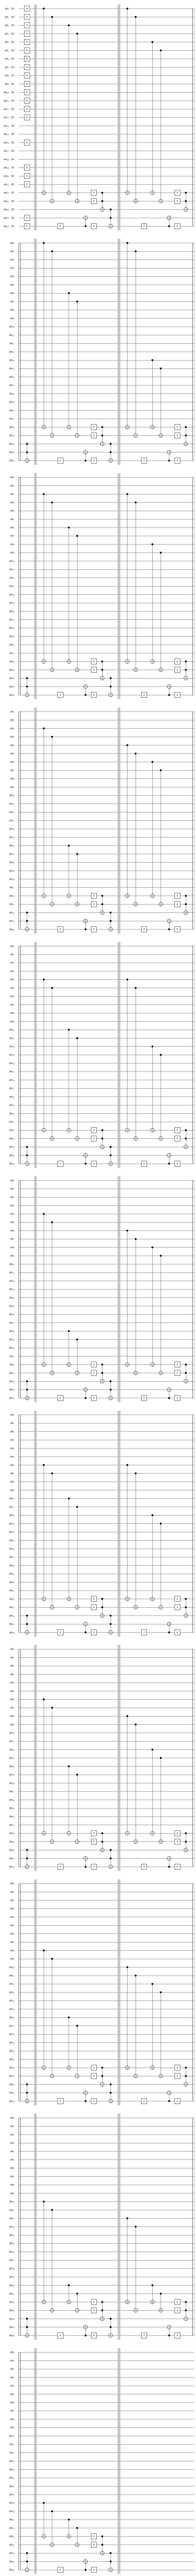

In [21]:
circ.draw(output='mpl')